In [1]:
#Import necesary libraries
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
#Reads csv from  the web and displays dataset info and first rows
fuelConsumtion_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv")
fuelConsumtion_df.info()
fuelConsumtion_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
#What are the different types of fuel used?
fuelConsumtion_df['FUELTYPE'].unique() 


array(['Z', 'D', 'X', 'E'], dtype=object)

In [4]:
#Convert fueltypes to categorical numbers
fuelConsumtion_df['FUELTYPE_CAT'] = fuelConsumtion_df['FUELTYPE'].astype('category')
# Fuel Type Z and X have the same emissions per consumption, practically making it the same 
fuelConsumtion_df['FUELTYPE_CAT'] = fuelConsumtion_df['FUELTYPE'].map({'X': 0, 'E':2, 'Z':0,'D':3})

In [5]:
#Display new Cats for fueldtyoe
fuelConsumtion_df['FUELTYPE_CAT'].unique()

array([0, 3, 2], dtype=int64)

In [6]:
#Summarize the data
fuelConsumtion_df.describe()


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,FUELTYPE_CAT
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679,0.248360
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304,0.715144
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000,0.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000,0.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000,0.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000,0.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000,3.000000


In [7]:
##Get only necesary columns to work with data
cdf = fuelConsumtion_df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS','FUELTYPE_CAT']]

cdf.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS,FUELTYPE_CAT
0,2.0,4,8.5,196,0
1,2.4,4,9.6,221,0
2,1.5,4,5.9,136,0
3,3.5,6,11.1,255,0
4,3.5,6,10.6,244,0


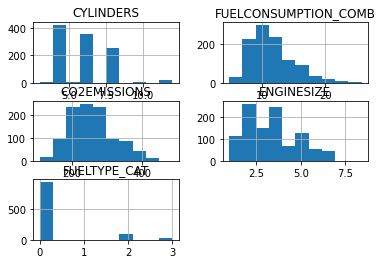

In [8]:
cdf[['CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS','ENGINESIZE','FUELTYPE_CAT']].hist()
plt.show()

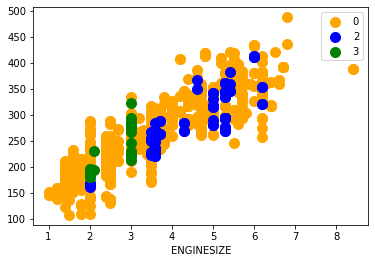

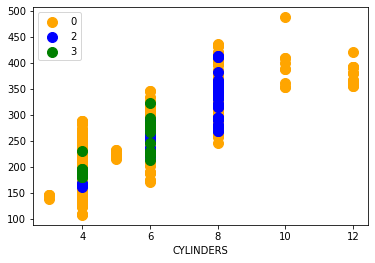

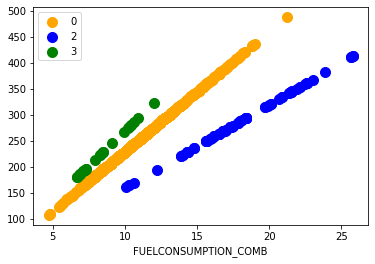

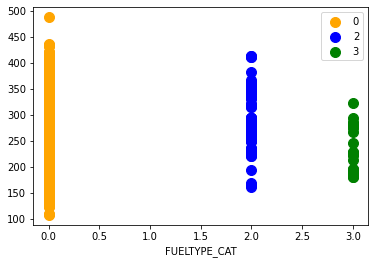

In [17]:
columns = ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELTYPE_CAT']

cdf_2 = cdf[['CO2EMISSIONS', 'ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELTYPE_CAT']]

label = [cdf['FUELTYPE_CAT'].unique()]
cdict = {0:'orange', 1: 'red', 2: 'blue', 3: 'green'}
for column in columns:
    fig, ax = plt.subplots()
    for g in np.unique(label):
        cdf_control_fuel = cdf.loc[cdf.FUELTYPE_CAT==int(g)]
        ax.scatter(getattr(cdf_control_fuel, column), cdf_control_fuel.CO2EMISSIONS, c = cdict[g], label = g, s = 100)
    ax.legend()
    plt.xlabel(column)
    plt.show()


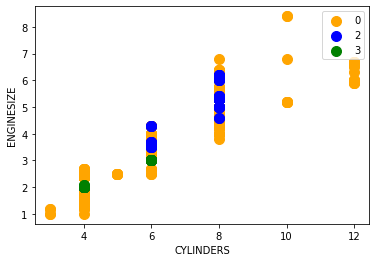

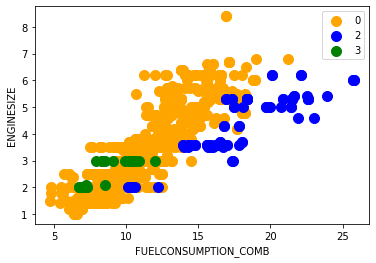

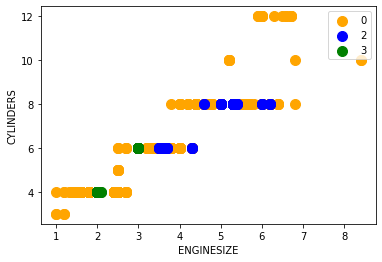

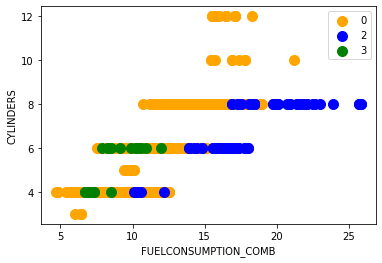

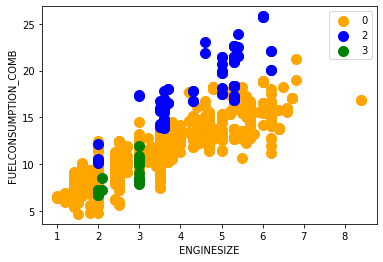

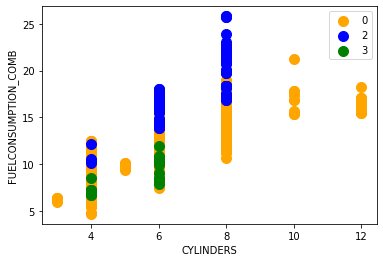

In [18]:
columns_2scatter = ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']
label = [cdf_2['FUELTYPE_CAT'].unique()]
cdict = {0:'orange', 1: 'red', 2: 'blue', 3: 'green'}
label

for column2 in columns_2scatter:
    for column in columns_2scatter:
        if column == column2:
            continue
        else:
            fig, ax = plt.subplots()
            for g in np.unique(label):
                cdf_control_fuel = cdf_2.loc[cdf_2.FUELTYPE_CAT==int(g)]
                ax.scatter(getattr(cdf_control_fuel, column), getattr(cdf_control_fuel, column2), c = cdict[g], label = g, s = 100)
            ax.legend()
            plt.xlabel(column)
            plt.ylabel(column2)
            plt.show()


In [19]:
msk = np.random.rand(len(fuelConsumtion_df)) < 0.8
train = cdf_2[msk]
test = cdf_2[~msk]

train.head()

,CO2EMISSIONS,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELTYPE_CAT
0,196,2.0,4,8.5,0
1,221,2.4,4,9.6,0
2,136,1.5,4,5.9,0
3,255,3.5,6,11.1,0
4,244,3.5,6,10.6,0


In [20]:
#Simple andlinear regression

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[16.29345264]]
Intercept:  [67.75641424]


Text(0, 0.5, 'Emission')

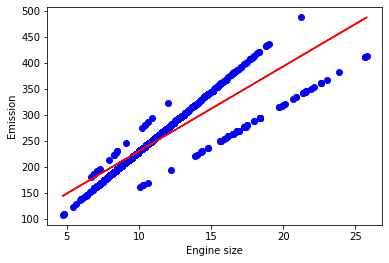

In [21]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [22]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 19.89
Residual sum of squares (MSE): 793.96
R2-score: 0.79


In [23]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)


Coefficients:  [[39.46413734]]
Intercept:  [124.13418856]


Text(0, 0.5, 'Emission')

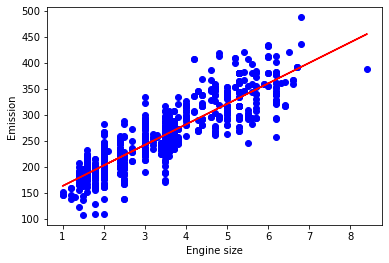

In [24]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [25]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 323.35
Residual sum of squares (MSE): 112010.01
R2-score: -28.27


In [26]:
##Multiple

from sklearn import linear_model
regr = linear_model.LinearRegression()
x_m_train = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELTYPE_CAT']])
y_m_train = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x_m_train, y_m_train)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)




Coefficients:  [[  8.05293086   6.27069597  12.34292446 -17.82997235]]
Intercept:  [54.43634964]


In [27]:
from sklearn.metrics import r2_score
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELTYPE_CAT']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELTYPE_CAT']])
y = np.asanyarray(test[['CO2EMISSIONS']])


# Explained variance score: 1 is perfect prediction
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y)))
print('Variance score: %.2f' % regr.score(x, y))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y) ** 2))

Mean absolute error: 14.36
Variance score: 0.89
Residual sum of squares (MSE): 425.47


fueltype: 0
Coefficients: [[22.99945307]]
Intercept:  [-0.00639989]
Mean absolute error: 0.25
Residual sum of squares (MSE): 0.09
R2-score: 1.00
----------------------------------------------------------------
----------------------------------------------------------------
fueltype: 2
Coefficients: [[15.99160146]]
Intercept:  [0.11182481]
Mean absolute error: 0.30
Residual sum of squares (MSE): 0.11
R2-score: 1.00
----------------------------------------------------------------
----------------------------------------------------------------
fueltype: 3
Coefficients: [[26.99456394]]
Intercept:  [0.05514916]
Mean absolute error: 0.20
Residual sum of squares (MSE): 0.06
R2-score: 1.00
----------------------------------------------------------------
----------------------------------------------------------------


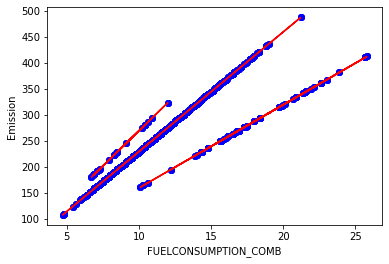

In [28]:
#What if we create 3 models, controlling for fuel_type??
from sklearn import linear_model
label = [cdf_2['FUELTYPE_CAT'].unique()]



for g in np.unique(label):
    
    regr = linear_model.LinearRegression()
    train1 = train.loc[train.FUELTYPE_CAT == g]
    test1 = test.loc[test.FUELTYPE_CAT == g]

    train_x = np.asanyarray(train1[['FUELCONSUMPTION_COMB']])
    train_y = np.asanyarray(train1[['CO2EMISSIONS']])
    regr.fit (train_x, train_y)
# The coefficients
    print('fueltype:', g)
    print ('Coefficients:', regr.coef_)
    print ('Intercept: ',regr.intercept_)
       
    test_x = np.asanyarray(test1[['FUELCONSUMPTION_COMB']])
    test_y = np.asanyarray(test1[['CO2EMISSIONS']])
    test_y_ = regr.predict(test_x)

    print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
    print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
    print("R2-score: %.2f" % r2_score(test_y , test_y_) )
    print("----------------------------------------------------------------\n----------------------------------------------------------------" )
    plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
    plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
    plt.xlabel("FUELCONSUMPTION_COMB")
    plt.ylabel("Emission")

#Is it better to have a single good multiple regression model? Or three excelent ones?

In [29]:
df = fuelConsumtion_df[['ENGINESIZE','MODEL','FUELTYPE','MAKE']].groupby(['MAKE','FUELTYPE'])['MODEL'] \
                             .nunique() \
                             .reset_index(name='count')
df

,MAKE,FUELTYPE,count
0,ACURA,Z,8
1,ASTON MARTIN,Z,5
2,AUDI,D,6
3,AUDI,Z,28
4,BENTLEY,Z,6
...,...,...,...
72,TOYOTA,X,31
73,VOLKSWAGEN,D,5
74,VOLKSWAGEN,X,6
75,VOLKSWAGEN,Z,11


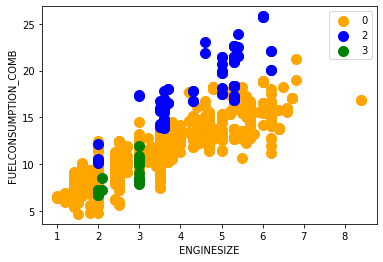

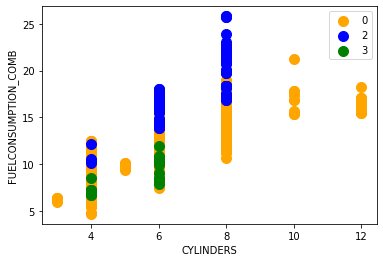

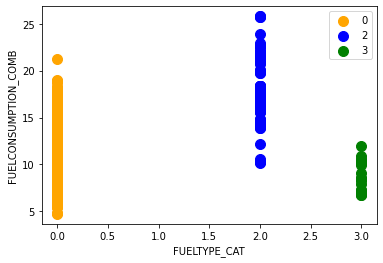

In [30]:
columns = ['ENGINESIZE','CYLINDERS','FUELTYPE_CAT']
label = [cdf_2['FUELTYPE_CAT'].unique()]

for column in columns:
    fig, ax = plt.subplots()
    for g in np.unique(label):
        cdf_control_fuel = cdf_2.loc[cdf_2.FUELTYPE_CAT==int(g)]
        ax.scatter(getattr(cdf_control_fuel, column), cdf_control_fuel.FUELCONSUMPTION_COMB, c = cdict[g], label = g, s = 100)
    ax.legend()
    plt.xlabel(column)
    plt.ylabel(column2)
    plt.show()